# Machine Learning project using Regression Techniques in Python


#### Prepared By : Kisha Taylor
#### Date completed: October 5th 2019 

This is a Machine Learning Project which uses the Boston Housing Prices dataset, applying Regression techniques to predict the outcome (median price) based on various attributes.


# Machine Learning Pipeline
Flowchart

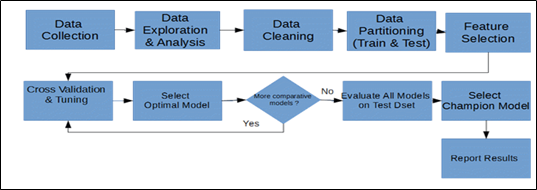

### Steps : 
 1. Problem Definition
 
 2. Data Collection 
     - Dataset : Boston Housing Market readily available
     
 3. Data Preparation 
 
     (i)   Data Exloration & Analysis
     
     (ii)  Data Cleaning
     
     (iii) Split into Train and Test
     
     (iv)  Feature Generation &/Or Feature Selection
      
     (v)   Data Preprocessing
     
           - Scale features where appropriate
           
 4. Train Model
 
 5. Validate Model & Tune Model hyperparameters
 
 6. Test Model assumptions 
       (Eg. assumptions of a regression model)
       
 7. Select best model 
 
 8. Report results
 
 9. Conclusion

#### Main Python Libraries used:
1. pandas - mainly for EDA
2. numpy  - mainly for EDA
3. sklearn - machine learning
4. Matplotlib - visualizations

## List of models used :
    1. Linear Regression 
              - using subset of features
    
    2. Polynomial Linear Regression
              - using subset of features
    
    3. Penalized Linear Regression - Lasso Regression
              - using subset of features
              - using all features
              - using polynomial transformation on all features
    
    4. Decision Regression Tree
    
    Ensemble Models :
    5. Random Forest
    6. Gradient Boosted Tree
    
    So, technically more than 8 models were evaluated as the polynomial features explored were
    to N polynomial degrees where N ranged from 2 to 5 (inclusive). There were 6 distinct types 
    of models evaluated as noted above. 

# 1. Problem Definition :
 Predict housing prices based on features specfic to houses as well as other relevant variables 
 that may impact prices (eg. crime rate in that neighbourhood).

# 2. Data Collection
In this case, it is straight forward as we only have to download the readily accessible dataset.


##### We will be importing the usual basic modules used in a typical data science project.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_dataset = load_boston()

# 3. Data Preparation 

###      (i)   Data Exploration & Analysis
#### We now explore and analyze the data to help us understand the data, this is key before we can think about extracting insights.

#### What do we need to understand about the data?
-	What is the structure and size of the dataset.
Eg. How many different features and rows or how fat/slim and short/tall ?
Width (fat or slim) is in reference to the number of features (columns in the datset).
The height of the dataset refers to the number of rows. So, a short and fat dataset has fewer rows than columns.
-	What kinds of variables are there ? Numeric or categorical
-	What are the values of the features?
-	How is each feature distributed ? Eg Normal distribution 
-	Basic descriptive statistics for each variable. Eg. Min, Max, Std Dev.  
-	Which variable is the target variable ? 
Is it categorical or numeric ?

    __Note : In our case, our target variable is numeric and we are performing regression.__


#### Dataset structure

In [4]:
fnames = boston_dataset.feature_names

In [5]:
BostonDf = pd.DataFrame(boston_dataset.data,columns = fnames)

#### Number of rows & columns respectively (fairly tall and thin)


In [6]:
BostonDf.shape

(506, 13)

#### View the dataset

In [7]:
BostonDf.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
print(boston_dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

#### Adding target variable to dataframe

In [9]:
BostonDf["MedianPrice"] = boston_dataset.target

In [10]:
BostonDf.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedianPrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Target variable type? Numeric
#### Basic Descriptive statistics on target var only

In [11]:
BostonDf['MedianPrice'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MedianPrice, dtype: float64

#### Basic Descriptive statistics on all variables

In [12]:
BostonDf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedianPrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Datatypes for all variables (all numeric)

In [13]:
BostonDf.dtypes

CRIM           float64
ZN             float64
INDUS          float64
CHAS           float64
NOX            float64
RM             float64
AGE            float64
DIS            float64
RAD            float64
TAX            float64
PTRATIO        float64
B              float64
LSTAT          float64
MedianPrice    float64
dtype: object

#### Examining each variable to assess its distribution using a histogram

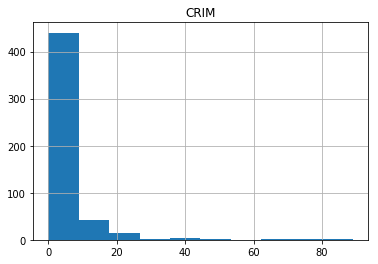

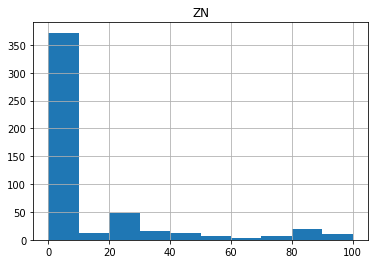

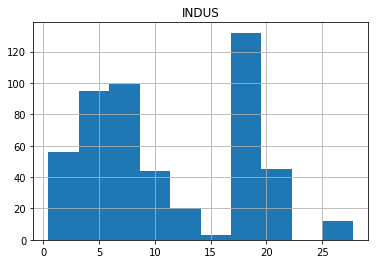

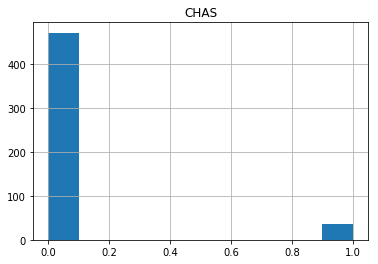

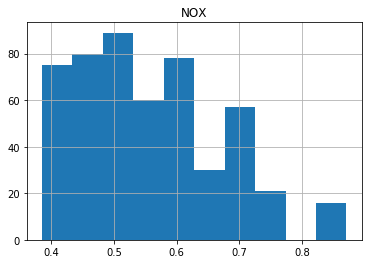

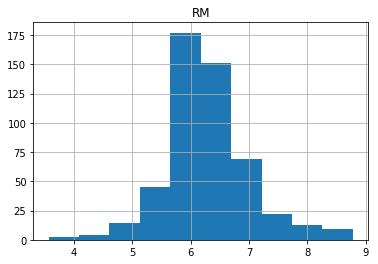

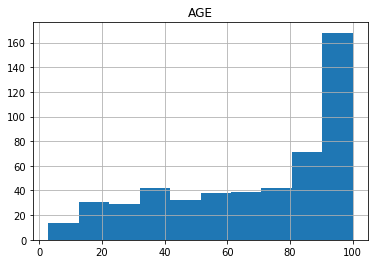

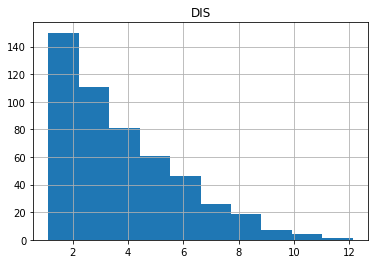

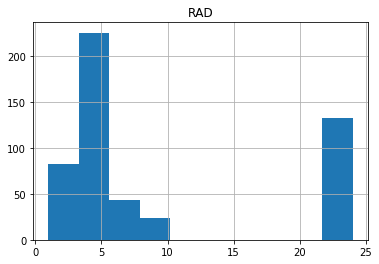

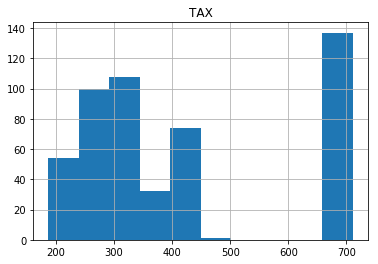

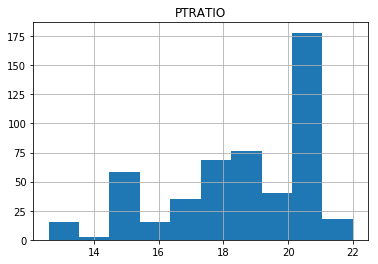

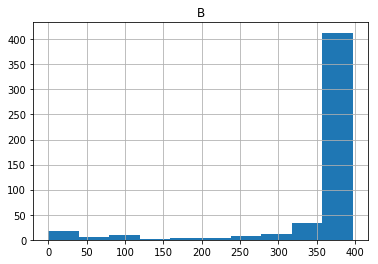

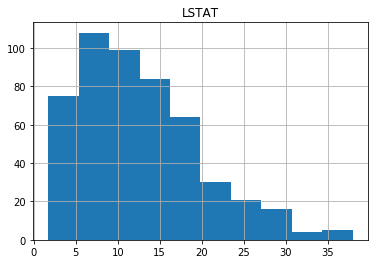

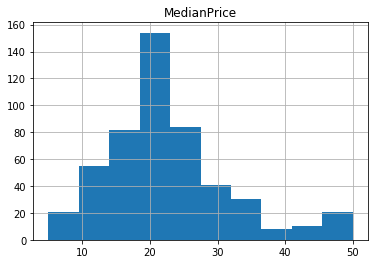

In [14]:
for feature in fnames:
    plt.figure()
    p = BostonDf[feature].hist()
    p= p.set_title(feature)
plt.figure()
p2 = BostonDf['MedianPrice'].hist()
p2 = p2.set_title('MedianPrice')


##### Let us visually examine the relationship between each independent feature and the target variable.

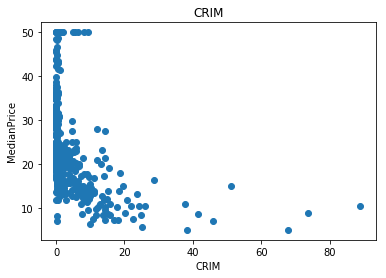

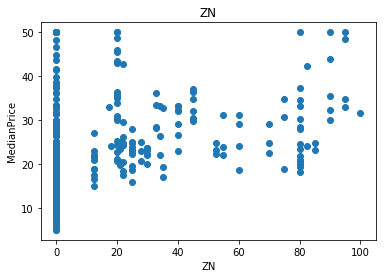

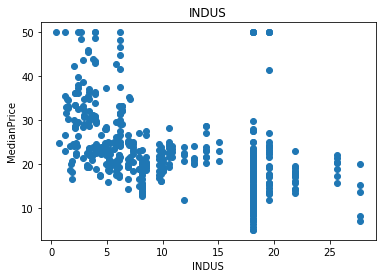

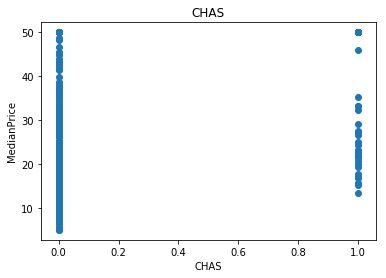

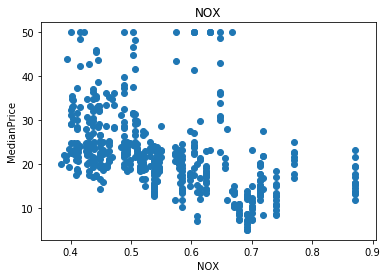

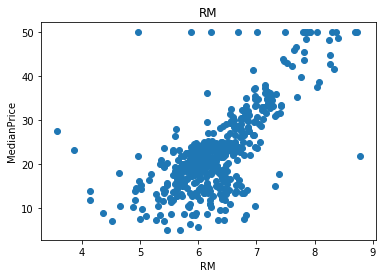

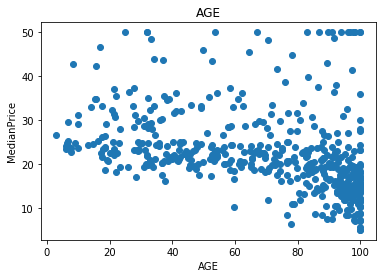

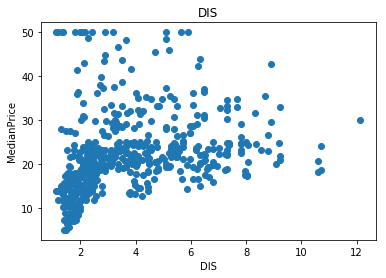

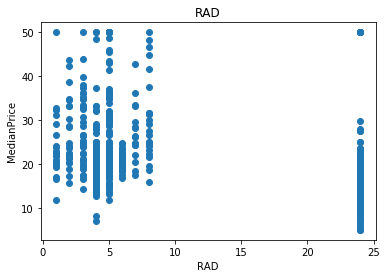

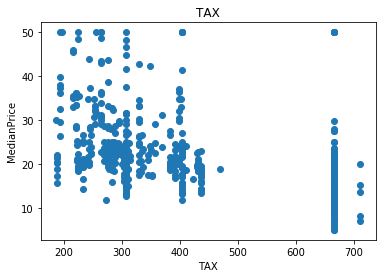

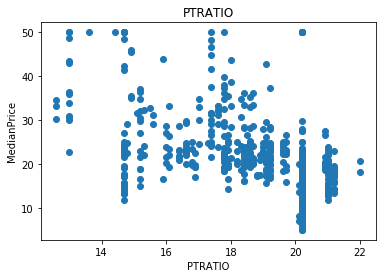

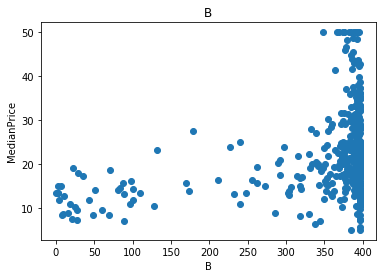

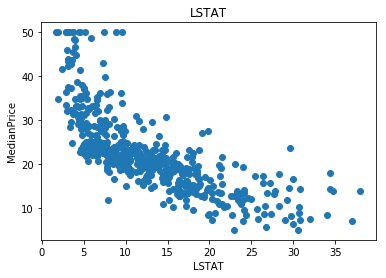

In [15]:

for f in fnames:
    plt.figure()
    plt.scatter(x=BostonDf[f],y=BostonDf["MedianPrice"])
    plt.title(f)
    plt.xlabel(f)
    plt.ylabel("MedianPrice")
    

#### Only the LSTAT and RM chart appear to reflects a linear relationship (somewhat).

## <font color = blue> Data Cleaning 

-	Check number of missing variables for each feature (i.e entire dataset).
Our dataset does not have missing values. If it did we could handle via imputation (eg. Fill in with mean values) or delete row with missing variable.

-	Check outliers 
Detected using 1.5 * IQR factor as threshold for deviation. That is, if the value falls outside the range of + or - 1.5*IQR where IQR is the Interquartile range (Q3-Q1) then it is an outlier.
Note that maybe necessary to eliminate outliers depending on model being used. Eg. Linear models assume that there are no outliers.
-	Transform data to dummy variables if categorical. (Note: No categorical variables in this case)


##### Count number of missing values in each column

In [16]:
BostonDf.isnull().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
MedianPrice    0
dtype: int64

No missing values in dataset

### __Remove outliers__

##### Outlier Visualization 
for each feature being used, use a boxplot visulalization to quickly identify outliers.


In [17]:
BostonDf.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MedianPrice'],
      dtype='object')

In [18]:
BostonDf.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedianPrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
target = BostonDf["MedianPrice"]

In [20]:
Df_XOnly = BostonDf.drop("MedianPrice",axis=1)

Xfeatures = Df_XOnly.columns

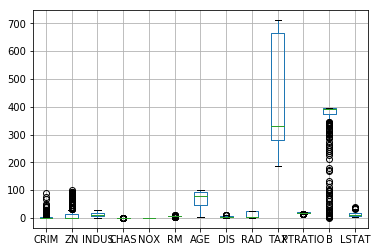

In [21]:
Df_XOnly.boxplot(column=list(Xfeatures))

In [22]:
Df_XOnly.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<Figure size 432x288 with 0 Axes>

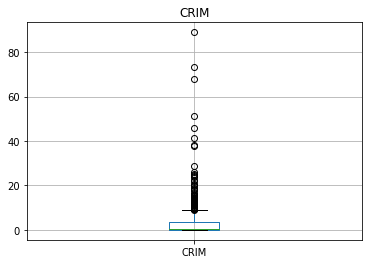

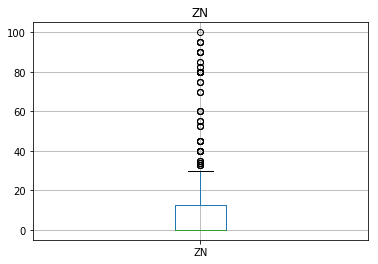

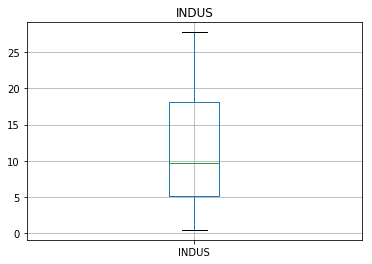

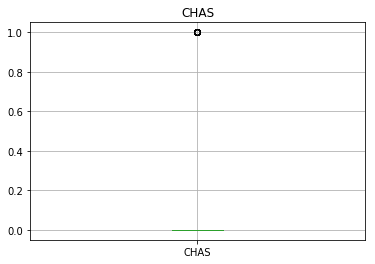

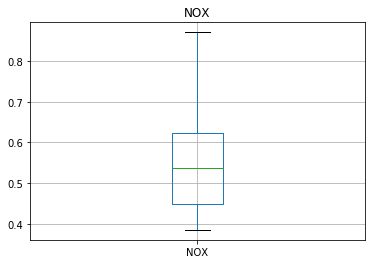

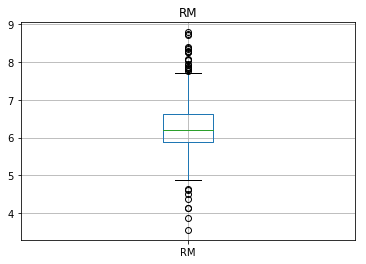

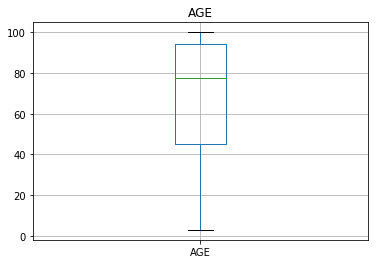

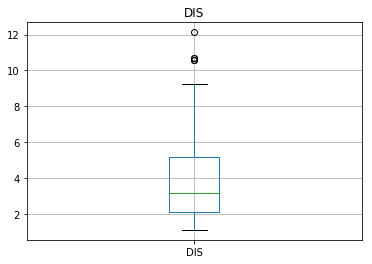

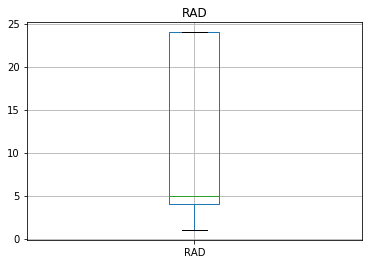

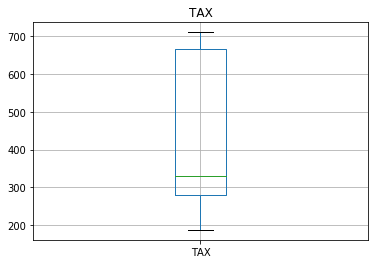

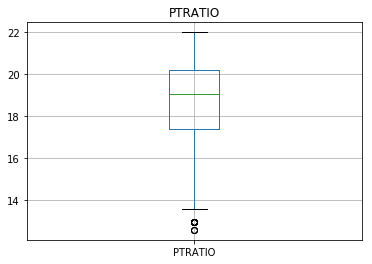

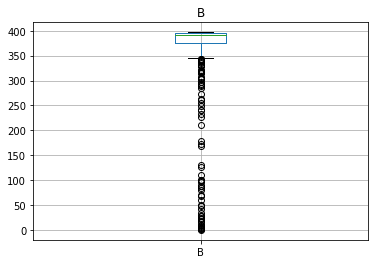

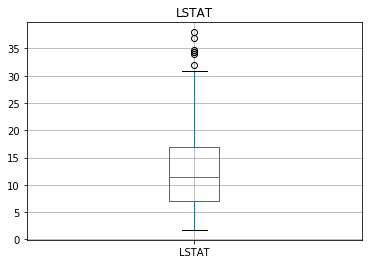

<Figure size 432x288 with 0 Axes>

In [23]:
for v in Xfeatures:
    plt.figure()
    p = Df_XOnly.boxplot(column=v)
    p= p.set_title(v)
plt.figure()


##### Chart Observations

 We see from the above boxplots that the following variables have outliers
 CRIM, ZN, RM,B (note : LSTAT, PTRATIO, DIS & CHAS have very few outliers)
 We ignore medianPrice since it is the target variable.


Let's start by identifying the outliers i.e the specific data points that rep.
outliers then we can remove the rows that contain them. 
Caution we will only do so if the number of rows are still not many with respect to the entire data set.

#### Outlier test
A data point is an outlier if it satisfies one of two conditions :

(i) It is less than Q1 - 1.5 * IQR

(ii) It is greater than Q3 + 1.5IQR

where Q1 and Q3 represent the  25th Percentle or 1st quartile and 75th percentile or 3rd quartile respectively.

**Identifying the number of observations that have outliers** for the respective variables 
that clearly had outliers from our above visualizations.

We will start by creating a dictionary to store these values

In [24]:
outliersdict = {'CRIM' : [] , 'ZN' : [] , 'RM' : [],'B' :[]}

In [25]:
outliersdict

{'CRIM': [], 'ZN': [], 'RM': [], 'B': []}

In [26]:
for f in ["CRIM", "ZN", "RM","B"] : 
    # for each feature that has an oulier from the visualization above, calculate the IQR 
    q3, q1 = np.percentile(Df_XOnly[f], [75 ,25])
    iqr = q3 - q1
    iqr

    # use this IQR in formula for each value of the variable for outlier test
    outlierRIndx = []
    cntx= -1
    for x in Df_XOnly[f]:
        cntx += 1
    
        # outlier test
        if ( (x < (q1 - 1.5*iqr)) or (x > (q3 + 1.5*iqr)) ):
            outlierRIndx.append(cntx)
    print("For feature:",f)        
    print("     Number of outliers is:" + str(len(outlierRIndx)))
    

    #Percentage of dataset that outliers represent
    print("     % of outliers in dataset for that feature: " + str(round((len(outlierRIndx) *100 / len(Df_XOnly)),4)))
    
    # add to dictionary of features the list of indices that represent the outliers for that feature
    outliersdict[f] = outlierRIndx
    
#outliersdict

For feature: CRIM
     Number of outliers is:65
     % of outliers in dataset for that feature: 12.8458
For feature: ZN
     Number of outliers is:68
     % of outliers in dataset for that feature: 13.4387
For feature: RM
     Number of outliers is:30
     % of outliers in dataset for that feature: 5.9289
For feature: B
     Number of outliers is:77
     % of outliers in dataset for that feature: 15.2174


#### Handling outliers

15% is pretty significant. **We can't get rid of 15% of our dataset.**
Especially since we do not know if these outliers are influential.
Some outliers are not influencial. That is the fitted line will not changed if we remove the outlier.
We can test this later. For now we will build the linear regression model 
and test model assumptions after.

## <font color=blue> Data Partitioning (Train & Test)
    
##### Further Pre-processing by splitting the dataset into train and test
This is done prior to any feature selection. 

In [27]:
from sklearn.model_selection import train_test_split

X = Df_XOnly[Xfeatures]
Y = target
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3, random_state=1) 
allXtrainOrig = Xtrain
allXtestOrig = Xtest

##### Perform feature selection on training dataset only
Ref. : https://machinelearningmastery.com/an-introduction-to-feature-selection/

## <font color= blue> Feature selection process
     1. conduct correlation analysis to identify redundant features 
          a. apply the Pearson's correlation analysis technique 
                        and
          b. apply the VIF technique
       
     2. drop redundant features
     
     Note we use both techniques because the Pearson's has advantages and drawbacks. The advantage of Pearson's is we can
     use a matrix to easily see the pair-wise correlations among predictive features and with the target variable. However, 
     the drawback of Pearson's is that the redundancy assessment is only conducted pair-wise and hence the interaction of 
     multiple variables will not be captured. Two variables may have a different relationship with a third variable when 
     examined together versus separately. 
     
     This limitation in Pearson's is addressed in the VIF technique as it allows assessment of multiple variables at the same 
     time. An easy matrix visualization, however, is not readily available.        

#### Performing a correlation analysis to identify and remove highly correlated features in feature selection phase. 
Correlation tells how two features which are linearly related vary together. It describes that relationship by giving us the direction (via sign either positive or negatve) and the strength of that relationship. Correlation values are between 0 and 1 in magnitude, signs are either positive or negative.  Pearson's correlation is used.

Note, in short the correlation value will tell us the strength of the linear relationship between two variables. Emphasis on linear, so if the correlation is zero it does not necessarily mean there is no relationship/association, it just means there is no linear relationship identified.

#### Plot correlation matrix to see the relationship between variables concatenate X and Y

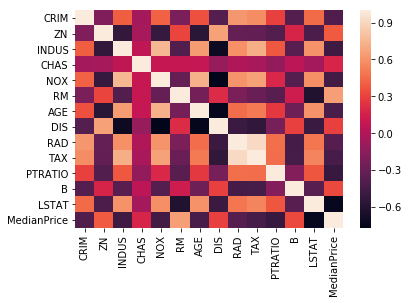

In [28]:
XYtrain = pd.concat([X,Ytrain],axis=1)

XYtrain_corrMat = XYtrain.corr()

XYtrain_corrMat.style.background_gradient()
sns.heatmap(XYtrain_corrMat)


In [29]:
XYtrain_corrMat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedianPrice
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.401303
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.385012
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.475169
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.183831
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.452672
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.649508
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.426367
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.295226
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.371497
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.437962


In [30]:
FeaturesXonly = XYtrain_corrMat.iloc[0:13,0:13].columns
FeaturesXonly

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

#### Identifying features that have a high correlation with another feature

In [31]:
#XYtrain_corrMat.columns
XYtrain_corrMat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedianPrice
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.401303
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.385012
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.475169
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.183831
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.452672
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.649508
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.426367
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.295226
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.371497
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.437962


### Sorting Correlation matrix in ascending order by correlation value with respect to the target variable. 

##### convert to dataframe & Sorting 

In [32]:
XYtrain_corrMat = pd.DataFrame(XYtrain_corrMat,columns=XYtrain_corrMat.columns, index=XYtrain_corrMat.columns).abs().sort_values(by='MedianPrice',axis=1,ascending=True)

In [33]:
XYtrain_corrMat

,CHAS,DIS,B,RAD,ZN,CRIM,AGE,TAX,NOX,INDUS,PTRATIO,RM,LSTAT,MedianPrice
CRIM,0.055295,0.377904,0.377365,0.622029,0.199458,1.000000,0.350784,0.579564,0.417521,0.404471,0.288250,0.219940,0.452220,0.401303
ZN,0.042697,0.664408,0.175520,0.311948,1.000000,0.199458,0.569537,0.314563,0.516604,0.533828,0.391679,0.311991,0.412995,0.385012
INDUS,0.062938,0.708027,0.356977,0.595129,0.533828,0.404471,0.644779,0.720760,0.763651,1.000000,0.383248,0.391676,0.603800,0.475169
CHAS,1.000000,0.099176,0.048788,0.007368,0.042697,0.055295,0.086518,0.035587,0.091203,0.062938,0.121515,0.091251,0.053929,0.183831
NOX,0.091203,0.769230,0.380051,0.611441,0.516604,0.417521,0.731470,0.668023,1.000000,0.763651,0.188933,0.302188,0.590879,0.452672
RM,0.091251,0.205246,0.128069,0.209847,0.311991,0.219940,0.240265,0.292048,0.302188,0.391676,0.355501,1.000000,0.613808,0.649508
AGE,0.086518,0.747881,0.273534,0.456022,0.569537,0.350784,1.000000,0.506456,0.731470,0.644779,0.261515,0.240265,0.602339,0.426367
DIS,0.099176,1.000000,0.291512,0.494588,0.664408,0.377904,0.747881,0.534432,0.769230,0.708027,0.232471,0.205246,0.496996,0.295226
RAD,0.007368,0.494588,0.444413,1.000000,0.311948,0.622029,0.456022,0.910228,0.611441,0.595129,0.464741,0.209847,0.488676,0.371497
TAX,0.035587,0.534432,0.441808,0.910228,0.314563,0.579564,0.506456,1.000000,0.668023,0.720760,0.460853,0.292048,0.543993,0.437962


In [34]:
XYtrain_corrMat = XYtrain_corrMat.abs().sort_values(by="MedianPrice",ascending=True)

In [35]:
XYtrain_corrMat.index[0]

'CHAS'

In [36]:
XYtrain_corrMat

,CHAS,DIS,B,RAD,ZN,CRIM,AGE,TAX,NOX,INDUS,PTRATIO,RM,LSTAT,MedianPrice
CHAS,1.000000,0.099176,0.048788,0.007368,0.042697,0.055295,0.086518,0.035587,0.091203,0.062938,0.121515,0.091251,0.053929,0.183831
DIS,0.099176,1.000000,0.291512,0.494588,0.664408,0.377904,0.747881,0.534432,0.769230,0.708027,0.232471,0.205246,0.496996,0.295226
B,0.048788,0.291512,1.000000,0.444413,0.175520,0.377365,0.273534,0.441808,0.380051,0.356977,0.177383,0.128069,0.366087,0.323627
RAD,0.007368,0.494588,0.444413,1.000000,0.311948,0.622029,0.456022,0.910228,0.611441,0.595129,0.464741,0.209847,0.488676,0.371497
ZN,0.042697,0.664408,0.175520,0.311948,1.000000,0.199458,0.569537,0.314563,0.516604,0.533828,0.391679,0.311991,0.412995,0.385012
CRIM,0.055295,0.377904,0.377365,0.622029,0.199458,1.000000,0.350784,0.579564,0.417521,0.404471,0.288250,0.219940,0.452220,0.401303
AGE,0.086518,0.747881,0.273534,0.456022,0.569537,0.350784,1.000000,0.506456,0.731470,0.644779,0.261515,0.240265,0.602339,0.426367
TAX,0.035587,0.534432,0.441808,0.910228,0.314563,0.579564,0.506456,1.000000,0.668023,0.720760,0.460853,0.292048,0.543993,0.437962
NOX,0.091203,0.769230,0.380051,0.611441,0.516604,0.417521,0.731470,0.668023,1.000000,0.763651,0.188933,0.302188,0.590879,0.452672
INDUS,0.062938,0.708027,0.356977,0.595129,0.533828,0.404471,0.644779,0.720760,0.763651,1.000000,0.383248,0.391676,0.603800,0.475169


In [37]:
featuresXY_corrMat = XYtrain_corrMat.columns
print(featuresXY_corrMat)

#print(CM.index)
#featuresCM == CM.index

Index(['CHAS', 'DIS', 'B', 'RAD', 'ZN', 'CRIM', 'AGE', 'TAX', 'NOX', 'INDUS',
       'PTRATIO', 'RM', 'LSTAT', 'MedianPrice'],
      dtype='object')


The function below called "drophighCorrVar" 
performs the following steps:

**Step #1** : We essentially are checking every element (i.e. correlation value) in every column (i.e. for each feature) 
in the correlation matrix.

**Step #2** : We check for a correlation value that exceeds our threshold (i.e high correlation values). 
We flag that feature to be dropped since it has a high correlation with another feature only if the feature to which it is highly correlated has Not already been dropped. __We only drop variables that are above the threshold and not equal to 1 since that would be indicating its correlation with itself.__


**Note**:

(i) We are working with a correlation matrix already sorted by the magnitude of the correlation with the dependent valriable "Median Price". This ensures that we first consider dropping the variables that have the least correlation to our dependent var.

(ii) we keep track of the features by the index.

In [1]:
def dropHighCorrVar(CMat): 

# input : correlation matrix sorted in asc order by absolute value of 
# correlation with MedianPrice (target var.) standard to regard
# highly correlated variables as having values >0.6
# Outputs droplist, list of indices that are highly correlated with at least one other variable.
     
    threshold = 0.6
    features =CMat.columns
    nfeat = len(features)
    droplist= []
    findx = -1
    for f in features[0:(nfeat-1)]:
        findx +=1
        rowindx = -1
        for x in CMat[f].abs():
            if rowindx <(nfeat-1):
                rowindx +=1
                if (x > threshold and x<1):
                    if (rowindx not in droplist):
                        droplist.append(findx)
                        break
            else:
                break 
    return(droplist)

#### Getting the Index of the redundant features

In [39]:
redundantfeaturesIndxlist= dropHighCorrVar(CMat=XYtrain_corrMat)


In [40]:
XYtrain_corrMat.columns.values

array(['CHAS', 'DIS', 'B', 'RAD', 'ZN', 'CRIM', 'AGE', 'TAX', 'NOX',
       'INDUS', 'PTRATIO', 'RM', 'LSTAT', 'MedianPrice'], dtype=object)

In [41]:
print("redundant features to be dropped : \n",XYtrain_corrMat.index[redundantfeaturesIndxlist].values)

redundant features to be dropped : 
 ['DIS' 'RAD' 'AGE' 'TAX' 'NOX' 'INDUS' 'RM' 'LSTAT']


### Feature Selection 
##### Performed after correlation analysis in data analysis phase revealed redundant features. 

In [42]:
redundantfeatureslist = XYtrain_corrMat.columns[redundantfeaturesIndxlist] 
print("redundant featureslist:",redundantfeatureslist)

XYtrain_corrMat = XYtrain_corrMat.drop(redundantfeatureslist,axis=1)
XYtrain_corrMat = XYtrain_corrMat.drop(redundantfeatureslist,axis=0)


redundant featureslist: Index(['DIS', 'RAD', 'AGE', 'TAX', 'NOX', 'INDUS', 'RM', 'LSTAT'], dtype='object')


In [43]:
print("Retained features :",XYtrain_corrMat.columns.values)

Retained features : ['CHAS' 'B' 'ZN' 'CRIM' 'PTRATIO' 'MedianPrice']


#### VIF (Variance Inflation Factor) 

###### Let us see the redundant features listing after using VIF (Variance Inflation Factor) 
VIF tells us how much the variance in the model has been inflated consequent on 
multicolinearity on the model.
VIF = 1 means no correlaation at all.
if VIF is between 1 & 5 : this means there is moderate correlation
while VIF > 5 means multicollinearity exists.

Note : The VIF for a particular feature is calculated by regressing the feature 
against all the other features. The formula is : VIFj = 1/(1-Rsq_j). So, feature_j 
is the dependent feature and all the other features are predictor variables in the model. 
Based on the formula, if Rsq_j approaches 1 then the value of VIF approaches infinity.
If Rsq =0 ( other features do not influence any variance in featurej, the dependent var) 
then the VIF = 1.   


In [44]:
BostonDf[Xfeatures].head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [45]:
# Calculate VIF for each feature -Ref: https://etav.github.io/python/vif_factor_python.html

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
def calcVIF(Df,newf):

# This function takes a Dataframe as input and the feature being assessed for multicollinearity.
        
    vif = pd.DataFrame()
    vif["VIF factor"] = [variance_inflation_factor(Df[newf.values].values,i) for i in range(len(newf))]
    vif["features"] = newf
    vif = vif.sort_values(by='VIF factor')
    return(vif)

VIF_fdropnames =[] 
print(Xfeatures)
VIF_Df = calcVIF(BostonDf,Xfeatures)
Cntfac = len(VIF_Df["VIF factor"]) -1
print(Cntfac)
print(VIF_Df)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
12
    VIF factor features
3     1.152891     CHAS
0     2.074626     CRIM
1     2.843890       ZN
12   11.088865    LSTAT
2    14.484283    INDUS
7    14.699368      DIS
8    15.154742      RAD
11   20.066007        B
6    21.386774      AGE
9    61.226929      TAX
4    73.902212      NOX
5    77.934969       RM
10   85.027314  PTRATIO


#### Note that we iteratively removed features, recalculating VIF on each step 
Instead of simply dropping features based on the VIF values simultaneously, we 
drop features iteratively. That is we recalculate the VIF after a feature is dropped. 
Notice how the VIF values change in many cases after a feature is removed.

If we dropped all the features in one step based on the initial VIF values we would have dropped 
features with high corelation to the dependent variable eg. 'LSTAT'. This feature was initially 
reflecting a VIF of 11.09 which is >10 so we would have dropped it. However, after removing other features (in the step below) and recalculating the VIF the LSTAT's VIF fell below the threshold of 10 and thus was not removed.

In [47]:
newDf = BostonDf[Xfeatures]
vifvalueMax = VIF_Df["VIF factor"].iloc[Cntfac]

while vifvalueMax> 5:
    f=VIF_Df["features"].iloc[Cntfac]
    print("Dropping redundant feature: ",f,"with VIF value of:",vifvalueMax,"in previous VIF table")
    VIF_fdropnames.append(f)
    newDf = newDf.drop(f,1)
    Cntfac = Cntfac-1
    print("Row #Cnt:",Cntfac)
    newf = newDf.columns
    VIF_Df = calcVIF(newDf,newf)
    print("\nRecalculated VIF table-after dropping redundant feature:",f)
    print(VIF_Df)
    vifvalueMax=VIF_Df["VIF factor"].iloc[Cntfac]

Dropping redundant feature:  PTRATIO with VIF value of: 85.0273135204276 in previous VIF table
Row #Cnt: 11

Recalculated VIF table-after dropping redundant feature: PTRATIO
    VIF factor features
3     1.142096     CHAS
0     2.073665     CRIM
1     2.451615       ZN
11   10.123961    LSTAT
7    12.222012      DIS
2    14.273985    INDUS
8    15.146040      RAD
10   18.578773        B
6    21.361197      AGE
9    59.301499      TAX
5    60.578630       RM
4    73.901444      NOX
Dropping redundant feature:  NOX with VIF value of: 73.90144446644008 in previous VIF table
Row #Cnt: 10

Recalculated VIF table-after dropping redundant feature: NOX
    VIF factor features
3     1.138215     CHAS
0     2.071675     CRIM
1     2.449671       ZN
10    9.192300    LSTAT
6    12.032864      DIS
2    13.149921    INDUS
7    15.142075      RAD
9    18.359526        B
5    19.889346      AGE
4    41.392221       RM
8    57.720177      TAX
Dropping redundant feature:  TAX with VIF value of: 57.7201

In [48]:
print("After dropping redundant features:")
print(VIF_Df.sort_values(by='VIF factor'))
print("\nRedundant features to be dropped from our dataset using VIF factor:\n",sorted(VIF_fdropnames))
print("\nRedundant features to be dropped from our dataset using Pearson's correlation matrix :\n",sorted(redundantfeatureslist.values))

After dropping redundant features:
   VIF factor features
2    1.059015     CHAS
0    2.020560     CRIM
1    2.236746       ZN
4    3.723832      RAD
3    3.934894      DIS
5    4.244625    LSTAT

Redundant features to be dropped from our dataset using VIF factor:
 ['AGE', 'B', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX']

Redundant features to be dropped from our dataset using Pearson's correlation matrix :
 ['AGE', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'RAD', 'RM', 'TAX']


#### Looking at correlation of redundant features to the dependent variable using an extract/subset of our correltion matrix

In [49]:
BostonDf.corr()['MedianPrice'][VIF_fdropnames].sort_values()

PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
AGE       -0.376955
B          0.333461
RM         0.695360
Name: MedianPrice, dtype: float64

#### Correlation of features retained with the dependent variable

In [50]:
BostonDf.corr()['MedianPrice'][VIF_Df["features"]].sort_values()

features
LSTAT   -0.737663
CRIM    -0.385832
RAD     -0.381626
CHAS     0.175260
DIS      0.249929
ZN       0.360445
Name: MedianPrice, dtype: float64

In [51]:
BostonDf.corr()['MedianPrice'].sort_values()

LSTAT         -0.737663
PTRATIO       -0.507787
INDUS         -0.483725
TAX           -0.468536
NOX           -0.427321
CRIM          -0.385832
RAD           -0.381626
AGE           -0.376955
CHAS           0.175260
DIS            0.249929
B              0.333461
ZN             0.360445
RM             0.695360
MedianPrice    1.000000
Name: MedianPrice, dtype: float64

##### Original list of variables

In [52]:
BostonDf.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedianPrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


##### Refined list after dropping reducdant features listed above

In [53]:
XYtrain = BostonDf.drop(VIF_fdropnames,axis=1)
XYtrain.head(10)

,CRIM,ZN,CHAS,DIS,RAD,LSTAT,MedianPrice
0,0.00632,18.0,0.0,4.0900,1.0,4.98,24.0
1,0.02731,0.0,0.0,4.9671,2.0,9.14,21.6
2,0.02729,0.0,0.0,4.9671,2.0,4.03,34.7
3,0.03237,0.0,0.0,6.0622,3.0,2.94,33.4
4,0.06905,0.0,0.0,6.0622,3.0,5.33,36.2
5,0.02985,0.0,0.0,6.0622,3.0,5.21,28.7
6,0.08829,12.5,0.0,5.5605,5.0,12.43,22.9
7,0.14455,12.5,0.0,5.9505,5.0,19.15,27.1
8,0.21124,12.5,0.0,6.0821,5.0,29.93,16.5
9,0.17004,12.5,0.0,6.5921,5.0,17.10,18.9


In [54]:
print("The predictor variables (features) we retained after dropping redundant ones : \n")
newfeatures = XYtrain.drop("MedianPrice",axis=1).columns
print(str(newfeatures))

The predictor variables (features) we retained after dropping redundant ones : 

Index(['CRIM', 'ZN', 'CHAS', 'DIS', 'RAD', 'LSTAT'], dtype='object')


In [55]:
y = XYtrain["MedianPrice"]

#### Repeating Scatter plot, this time isolating newly selected feature and median price


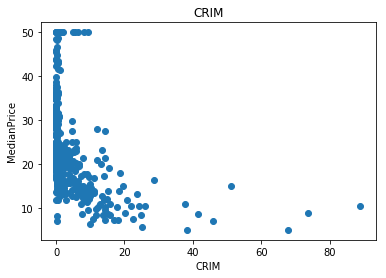

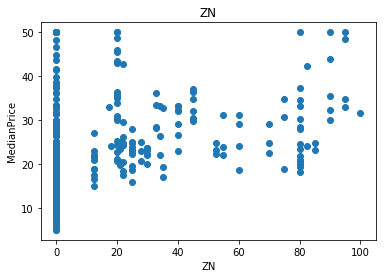

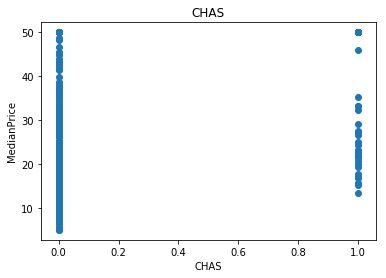

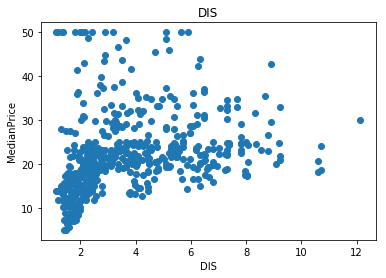

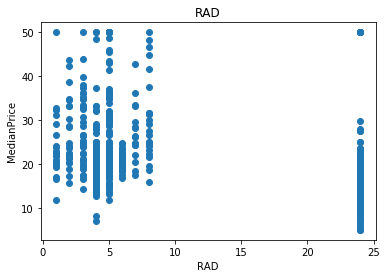

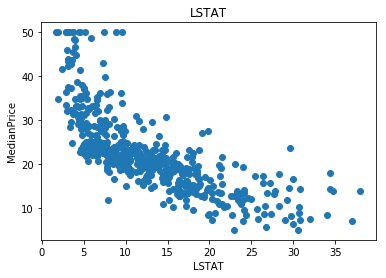

In [56]:
for feature in newfeatures:
    plt.figure()
    plt.scatter(x=XYtrain[feature],y=y)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("MedianPrice")


**Note that LSTAT (as mentioned previously) is the only feature that exhibits a linear relationship with the target var (MedianPrice).**
RM is no longer being used as it was identified as being highly correlated with at least one other variable.

In [57]:

sklearn.metrics.SCORERS.keys() #useful to quickly identify the appropriate variable to use.

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'median_absolute_error', 'mean_absolute_error', 'mean_squared_error', 'accuracy', 'roc_auc', 'average_precision', 'log_loss', 'neg_log_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [58]:
XYtrain.head(5)

,CRIM,ZN,CHAS,DIS,RAD,LSTAT,MedianPrice
0,0.00632,18.0,0.0,4.0900,1.0,4.98,24.0
1,0.02731,0.0,0.0,4.9671,2.0,9.14,21.6
2,0.02729,0.0,0.0,4.9671,2.0,4.03,34.7
3,0.03237,0.0,0.0,6.0622,3.0,2.94,33.4
4,0.06905,0.0,0.0,6.0622,3.0,5.33,36.2


## Preprocessing of data (prior to training of model)
**Scaling of features prior to training**
Feature Scaling is when feature values are converted/transformed to a common scale.

This is a neceassary because of the ML models being explored. Since we start with Linear regression, scaling matters. 
High magnitude features will be favoured and tretaed  by the model as having higher predictive power simply because of its higher magnitude. Scaling handles that by transforming the values to one common range of values. 

We have used standard scaling as our scaling technique. It transforms values to z-scores as values are transformed to a standard normal distribution where mean = 0 an std dev. = 1. We could have used other techniques such as mean normalization, Min_max scaling etc.


In [59]:
from sklearn.preprocessing import StandardScaler

# Objectify the scaler function
Myscaler = StandardScaler()
   
    
# Filtering the features based on the earlier correlation analysis
Xtrain =  Xtrain[newfeatures]
Xtest = Xtest[newfeatures]

# Actual scaling of data

ScaledXtrain = Myscaler.fit_transform(Xtrain)
ScaledXtest = Myscaler.fit_transform(Xtest)

In [60]:
ScaledXtrain

array([[-0.36267372, -0.48366069, -0.30429031,  0.41232701, -0.64598348,
        -0.64691635],
       [-0.41652364,  0.58018848, -0.30429031,  1.40141789, -0.19090258,
         0.20337764],
       [ 0.7181724 , -0.48366069, -0.30429031, -1.15705238,  1.62942102,
         1.13897622],
       ...,
       [ 0.25362769, -0.48366069, -0.30429031, -1.00768138,  1.62942102,
         0.88168661],
       [-0.39786162, -0.48366069, -0.30429031, -0.08226528, -0.19090258,
        -0.28643573],
       [-0.42728892, -0.48366069, -0.30429031,  0.05000396, -0.53221326,
        -0.57674646]])

# Model Building 



### Training the model
##### A Multiple Linear Regression model






In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import statistics as stat
import statsmodels.api as sm



#### Note that for Linear regression there are no hyperparameters to tune.
#### Let us now use cross validation to estimate the model's performance on unseen data

<font color = blue> **Impt. Note:**
        
We only used stats model to view full results given for linear regression.
However since we are only focusing on the predictions and not on the interpretation of the model 
then we are simply going to use the Scikit learn package methods for all subsequent models being compared.

In [62]:
X = sm.add_constant(ScaledXtrain) # adding a constant

model = sm.OLS(Ytrain, X).fit()
predictions = model.predict(X) 

print_model_LinR_train = model.summary()
print(print_model_LinR_train)

#model.pvalues

                            OLS Regression Results                            
Dep. Variable:            MedianPrice   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     91.43
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           2.09e-68
Time:                        21:32:36   Log-Likelihood:                -1112.7
No. Observations:                 354   AIC:                             2239.
Df Residuals:                     347   BIC:                             2267.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.3398      0.301     74.196      0.0

In [63]:
Xtrain.head()

,CRIM,ZN,CHAS,DIS,RAD,LSTAT
13,0.62976,0.0,0.0,4.7075,4.0,8.26
61,0.17171,25.0,0.0,6.8185,8.0,14.44
377,9.82349,0.0,0.0,1.3580,24.0,21.24
39,0.02763,75.0,0.0,5.4011,3.0,4.32
365,4.55587,0.0,0.0,1.6132,24.0,7.12


In [64]:
X = sm.add_constant(ScaledXtest)
pred_values = model.predict(X)

In [65]:
MSE_LinearSubX  = mean_squared_error(Ytest,pred_values)

In [66]:
print("Subset of Features used as follows: ",Xtest.columns.values)

Subset of Features used as follows:  ['CRIM' 'ZN' 'CHAS' 'DIS' 'RAD' 'LSTAT']


In [67]:
MSE_LinearSubX

34.66431367021152

In [68]:
R2_LinearSubX = r2_score(Ytest,pred_values)
R2_LinearSubX

0.621793599349807

In [69]:
n = len(Ytest)
k = len(Xtest.columns)
Adj_R2_LinearSubX = 1 - ( (1-R2_LinearSubX)*(n-1)/(n-k-1))

In [70]:
Adj_R2_LinearSubX

0.6061436793229025

Let's now test the linear model's assumptions.

-	Assumption #1: 
Linear relationship exists between independent variables and response 
(or dependent) variables.  
-	Assumption #2: 
No multicollinearity, already checked and action taken resulting in the removal of 
redundant vars.
-	Assumption #3: 
Homoscedasticity - Constant variance of the errors. 
-	Assumption #4: 
The residuals must not be correlated i.e no autocorrelation must exist.
-	Assumption #5: 
Residuals must be normally distributed. 

**Note the focus of this project was not on testing a hypothesis but rather on a comparison of the performance of each model based on the predictions. We could have easily have omitted this part.**


##### Ref. :https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-guide-regression-analysis-plot-interpretations/tutorial/
#####  Ref.: https://statisticsbyjim.com/regression/ols-linear-regression-assumptions/      

####  Testing Linear Assumptions #1 & #3
Let's examine if predictor variables have linear relationship with dependent variables. 
       -  Plot of residuals (on y-axis) vs fitted (predicted values on x-axis)
       and 
Let us test linearity and homoskedasticity (opposite of hereoskedasticity, what we do not want)
       - We can do that by plotting the residual against the fitted values ( same plot for detecting linearity above)

Text(0,0.5,'Residuals')

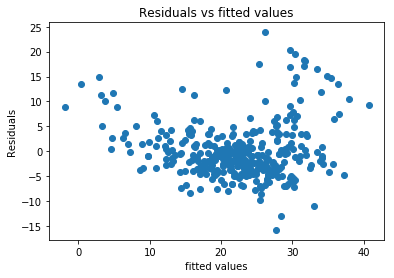

In [346]:
X = sm.add_constant(ScaledXtrain)
pred_valuesTr = model.predict(X)
residualsTr = Ytrain - pred_valuesTr

#plot of residuals vs predicted values 
plt.figure()
plt.scatter(x= pred_valuesTr,y=residualsTr)
plt.title("Residuals vs fitted values")
plt.xlabel("fitted values")
plt.ylabel("Residuals")


As we can observe in the plot above, **there is a violation of homoscedasticity.**
This, given that, as the fitted value increases the residual points get more dispersed.
Thus, the variance is non-constant.

Note this same plot can also indicate that the underlying pattern in the data is non-linear
yet we are using a linear model to fit the data.

#### Testing Linear Regression Assumption#4
Let's assess for the assumption of no autocorrelation of the error terms.

We will do so by **plotting the error terms (residuals) on y-axis and the x-axis in the order** in which they lie.

In [347]:
CntrowsTr = residualsTr.shape[0]

In [348]:
CntrowsTr
print(len(range(CntrowsTr)))

print(residualsTr.shape[0])


354
354


Text(0,0.5,'Residuals')

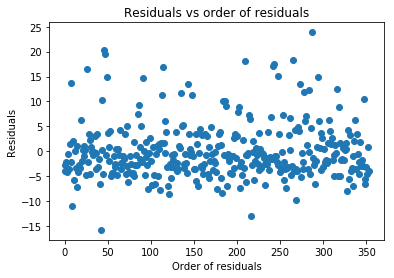

In [349]:
#plot of residuals vs predicted values 
plt.figure()
plt.scatter(x=range(CntrowsTr),y=residualsTr)
plt.title("Residuals vs order of residuals")
plt.xlabel("Order of residuals")
plt.ylabel("Residuals")


#plt.yticks(np.arange(-40, 40, 5))
#plt.xticks(np.arange(5,50,5))

##### Finally we need to check for assumption#5 - Normality of error terms ?
We will use a QQPlot to detect normality.

The QQPlot is used to determine if two sets of data come from the same distribution. 
We are trying to determine if the error terms come from a normal distribution.

Steps :
    #1: We will first standardize the error terms.
    #2: generate a qqplot.
    #3: we will check if points lie along diagonal line.


**Observation:**
Graph above suggests **existence of auto correlation, a violation of an assumption.**
Notice how the data points are not symmetrical (or randomly scattered) around the "invisible" horizontal zero line. 


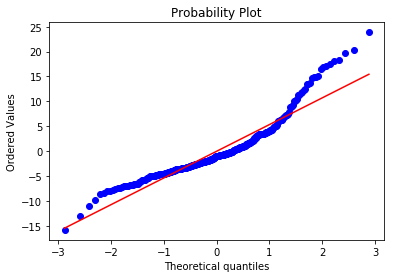

In [350]:
import scipy.stats as stats

stats.probplot(residualsTr, dist="norm", plot=plt)
plt.show()

#Ref: http://www.insightsbot.com/blog/HeGop/assumptions-of-linear-regression-with-python


**Observation:** 

qqplot above suggests **no normality of the distribution of error terms, a violation of assumption #5.**

- Notice how the data points do not lie on the straight red line.



Text(0.5,1,'MedianPrice')

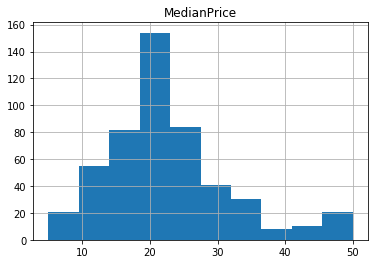

In [451]:
plt.figure()
p=BostonDf['MedianPrice'].hist()
p.set_title('MedianPrice')

Histogram above sugests a fairly normal distribution. However, right-skewness noticeable.

##### So, the following violations of Linear Assumption were detected :
(i)  No Linear relationship between predictor and dependent variables

(ii) No Homoscedasticity - i.e. No constant variance of error terms (Heteroscedasticity observed instead)
- Both observed using plot of residuals vs fitted / predicted values (x-axis)
            
(iii) No Uncorrelation of error terms - no pattern between consecutive error terms (Autocorrelation observed instead).
- observed using plot of residuals versus order of residuals
            
(iv) No Normality of the error terms
- observed using the qqplot of the residuals
             

## Remedial steps 
 What steps  can we take to handle this violation (of non linearity of dependent & pedictor variable) in an attempt to correct it ?
 
**We could transform the data using log transformation.**

**Alternatively**, we could simply go to the next step below (Polynomial Linear Regression).

### Let's use <font color = blue> Polynomial Linear regression
instead since the data appears non-linear
    
**We will use the subset of features**

In [361]:
print("Subset of Features used as follows: ",Xtrain.columns.values)

Subset of Features used as follows:  ['CRIM' 'ZN' 'CHAS' 'DIS' 'RAD' 'LSTAT']


In [351]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error


In [352]:
startN =2
endN =5
PolyN = np.arange(startN,endN+1)

NumPolyN  = endN - startN +1

# create results array
ResultsPolyN = np.array(np.zeros(NumPolyN*3)).reshape(-1,3)
ResultsPolyN = pd.DataFrame(ResultsPolyN,columns = ["MSE","R-sq","Adj_R_sq"])

ResultsPolyN["Poly degree N"] = PolyN


In [353]:
n = len(Ytest)
k = len(Xtest.columns)

for d in PolyN :
    
    # transform original unscaled X first then scale last
    Xpoly = PolynomialFeatures(degree = d) 
    XtrainpolyValues = Xpoly.fit_transform(X= Xtrain)
    XtestpolyValues = Xpoly.fit_transform(X= Xtest)


    # Now scale the transformed X polynomial values
    ScaledXtrain = Myscaler.fit_transform(XtrainpolyValues)
    ScaledXtest = Myscaler.fit_transform(XtestpolyValues)

    
    polyXModel = lin_model.fit(ScaledXtrain, Ytrain)
    pred_values = polyXModel.predict(ScaledXtest)

    # Let's estimate the model's performance on unseen data
    # by doing cross validation. Same technique applied in our previous linear model. 

    #MSE = stat.mean(-1*cross_val_score(polyXModel,ScaledXtrain,Ytrain,cv=5,scoring = 'neg_mean_squared_error'))
    #R2 = stat.mean(cross_val_score(polyXModel, ScaledXtrain,Ytrain,cv=5,scoring = 'r2'))
    
    MSE = mean_squared_error(Ytest,pred_values)
    R2  = r2_score(Ytest,pred_values)

    Adj_R_sq = 1 - ( (1-R2)*(n-1)/(n-k-1))
    
    ResultsPolyN.iloc[d-2,0] = round(MSE,4)
    ResultsPolyN.iloc[d-2,1] = round(R2,4)
    ResultsPolyN.iloc[d-2,2] = round(Adj_R_sq,4)
    
""" Ref. : https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/ """

In [354]:
print(Xtest.columns)

Index(['CRIM', 'ZN', 'CHAS', 'DIS', 'RAD', 'LSTAT'], dtype='object')


In [355]:
Xpoly = PolynomialFeatures(degree = 2) 
XtrainpolyValues = Xpoly.fit_transform(X= Xtrain)

""" Now scale the transformed X polynomial values """
ScaledXtrain = Myscaler.fit_transform(XtrainpolyValues)
polyXModel = lin_model.fit(ScaledXtrain, Ytrain)
polyXModel.coef_

array([ 7.17880271e-13, -1.04474480e+01,  5.83631809e+00, -1.13151576e+00,
       -1.16441917e+01,  1.00196939e+01, -2.13519523e+01,  9.63345562e-01,
        4.90404919e-01,  2.75148207e+00,  1.20554195e+00,  6.52913648e+00,
        2.28130398e-01,  4.60793645e+00, -1.11501531e+00, -9.70294312e+00,
       -3.26050135e-01, -7.25712918e-01, -1.13151576e+00,  4.47976779e+00,
       -2.55043068e+00, -4.69625610e-01,  9.36982706e+00, -1.79234394e+00,
        3.14921607e+00, -5.64015194e+00, -2.78041274e+00,  1.35312606e+01])

In [356]:
ResultsPolyN


,MSE,R-sq,Adj_R_sq,Poly degree N
0,25.7874,0.7186,0.7070,2
1,43.9924,0.5200,0.5002,3
2,547.3210,-4.9716,-5.2187,4
3,16921.9011,-183.6271,-191.2668,5


#### Note that the R-sq value (goodness of fit measure) worsens significantly as the polynomial degree increased.
See results above with increasing polynomial degree values. 
#### Some of the R-squared values were negative (Ploy degree N = 4 & 5), which is not good as R-sq should be close to 1
#### and is not usually negative. 
**We will select polynomial degree = 2** since it reflects an acceptable value (positive and between 0 & 1) for Adj-R-square of 0.71 or 71%. This means that 71% of the variance (adjusted for the # of predictor var)in the dependent variable, median price, is explained by the model.

Note the dfference between R-Squared and Adj.-R-Squared. They are very similar and essential both measure the goodness of fit as evidenced by the % of variance explained by the model. However, since R-sq. will improve simply because of increase in the # of predictors and not necessarily because it is a beter performing model, we need to control for the increase in the # predictors when assessing the goodness of fit. This is what the Adjusted R-squred value does. Note the formula below :
  As k (# predictors increase), the numerator will have a greater impact of the magnitude of the metric (if the increase in R-sq 
  is better than expected) by outweighing the impact on the metric of an increase in k. 
  
        Formula:  Adj-R-squared = 1 - ( (1-R-sq)*(n-1)/(n-k-1))
                   where k rep. # predictors 
                         n rep. # data points (or # instances) 

In [357]:
MSE_Poly2  =ResultsPolyN.iloc[0,0]
R2_Poly2 = ResultsPolyN.iloc[0,1]
Adj_R_sq_Poly2 = ResultsPolyN.iloc[0,2]

print("Results fr Polynomial wih degree N=2 (Quadratic) :")
print("MSE_Poly2 :",MSE_Poly2)
print("R2_Poly2 :",R2_Poly2) 
print("Adj_R_sq_Poly2 :",Adj_R_sq_Poly2) 

Results fr Polynomial wih degree N=2 (Quadratic) :
MSE_Poly2 : 25.7874
R2_Poly2 : 0.7186
Adj_R_sq_Poly2 : 0.707


### <font color= Blue>Penalized Linear Regression  - Lasso Regression:</font>
This is a statistical technique to avoid over-fitting and its is being used 
now because we want to explore the possibility of using more features by
letting the model innately (naturally) choose for us. 

The model shrinks the coefficients (possibly even to zero) by adding a penalty term to the 
Loss function (OLS). This penalty term is defined as the sum of Beta (feature vector) squared 
multiplied by λ (lambda, a control variable with values greater than or equal to 0).
As λ approaches infinity, the coefficients shrink towards zero. 
As λ  approaches 0, the coefficients get larger (vs. the former case). Note at λ = 0, 
the penalty term has no effect.

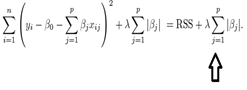

Ref. for eqn.: Introduction to Statistical Learning in R (ISLR)

#### We will use the subset of features

In [362]:
print("Subset of Features used as follows: ",Xtrain.columns.values)

Subset of Features used as follows:  ['CRIM' 'ZN' 'CHAS' 'DIS' 'RAD' 'LSTAT']


#### Cross-validation and tuning being performed together.


In [358]:
#Set your hyperparameter values you will explore in tuning.
#lasso_params = {'alpha':[0.02, 0.021,0.022,0.023,0.024, 0.025, 0.026, 0.027,0.027,0.028,0.029,0.030]}
#lasso_params = {'alpha' : np.arange(0,10,0.001)}
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso_params = {'alpha' : np.arange(0.1,20,0.1)}
LassoReg = Lasso(random_state=2,max_iter=5000)

LassoRegression = GridSearchCV(estimator=LassoReg,param_grid=lasso_params,n_jobs=-1,cv=5,scoring = 'neg_mean_absolute_error')

In [212]:
Xtrain.head(5)

,CRIM,ZN,CHAS,DIS,RAD,LSTAT
13,0.62976,0.0,0.0,4.7075,4.0,8.26
61,0.17171,25.0,0.0,6.8185,8.0,14.44
377,9.82349,0.0,0.0,1.3580,24.0,21.24
39,0.02763,75.0,0.0,5.4011,3.0,4.32
365,4.55587,0.0,0.0,1.6132,24.0,7.12


#### Using untransformed X and _subset_ of original features

In [246]:
ScaledOrigXtrain = Myscaler.fit_transform(Xtrain)
ScaledOrigXtest = Myscaler.fit_transform(Xtest)

In [247]:
LassoRegression.fit(ScaledOrigXtrain,Ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=2,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': array([ 0.1,  0.2, ..., 19.8, 19.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [248]:
-1*LassoRegression.best_score_

4.107009190557806

In [249]:
LassoRegression.best_estimator_.alpha

0.1

In [250]:
LassoRegression.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=2,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': array([ 0.1,  0.2, ..., 19.8, 19.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)>

In [251]:
LassoRegression.best_estimator_.coef_

array([-0.68170329,  2.18029274,  0.93511665, -2.25696078, -0.25458417,
       -6.29287423])

In [252]:
LassoRegression.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=2,
   selection='cyclic', tol=0.0001, warm_start=False)

In [253]:
Xtrain.columns # Note we scaled the values from Xtrain

Index(['CRIM', 'ZN', 'CHAS', 'DIS', 'RAD', 'LSTAT'], dtype='object')

In [254]:
Pred_LregX = LassoRegression.predict(ScaledOrigXtest)

MSE_LassoRegressSubX =  round(mean_squared_error(Ytest,Pred_LregX),5)
R2_LassoRegressSubX = round(r2_score(Ytest,Pred_LregX),5)

n = len(Ytest)
k = len(Xtest.columns)

Adj_R_sq_LassoRegressSubX  = round(1 - ( (1-R2_LassoRegressSubX)*(n-1)/(n-k-1)),5) 

In [398]:
print("Results for Lasso Regression using subset of features (after multicollinear variable handled) :")
print("MSE:",MSE_LassoRegressSubX)
print("R-Sq.: :",R2_LassoRegressSubX)
print("Adj-R-Sq. :",Adj_R_sq_LassoRegressSubX)
print("Features used: ",Xtrain.columns.values)

Results for Lasso Regression using subset of features (after multicollinear variable handled) :
MSE: 35.12683
R-Sq.: : 0.61675
Adj-R-Sq. : 0.60089
Features used:  ['CRIM' 'ZN' 'CHAS' 'DIS' 'RAD' 'LSTAT']


### <font color= Blue> Penalized Linear Regression <font color= Black>
**Using all attributes - no subsetting** before feature selection applied.
No polynomial transformation of features applied

In [399]:
print("All Features were used:", allXtrainOrig.columns.values)

All Features were used: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


#### Scaling all original features & training model

In [382]:
Myscaler.fit_transform(allXtrainOrig)

array([[-0.36267372, -0.48366069, -0.46209575, ...,  1.18880212,
         0.43987709, -0.64691635],
       [-0.41652364,  0.58018848, -0.90151022, ...,  0.58247746,
         0.231398  ,  0.20337764],
       [ 0.7181724 , -0.48366069,  0.99191363, ...,  0.81567925,
         0.43987709,  1.13897622],
       ...,
       [ 0.25362769, -0.48366069,  0.99191363, ...,  0.81567925,
         0.43987709,  0.88168661],
       [-0.39786162, -0.48366069, -0.74530641, ..., -0.49025077,
         0.21666488, -0.28643573],
       [-0.42728892, -0.48366069, -0.78034278, ...,  0.34927567,
         0.43987709, -0.57674646]])

In [383]:
LassoRegression.fit(Myscaler.transform(allXtrainOrig),Ytrain)

#print(LassoRegression.best_estimator_.coef_)
#print(allXtrainOrig.columns)


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=2,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': array([ 0.1,  0.2, ..., 19.8, 19.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [384]:
allXtrainOrig.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

In [385]:
a = np.concatenate((allXtrainOrig.columns.values,LassoRegression.best_estimator_.coef_),axis=0)
a

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', -0.4881595634215708,
       0.8525758334615832, -0.0, 0.7016073571380476, -1.9621125219918971,
       2.0770351049990587, -0.0, -2.466508259583542, 0.8921316710428188,
       -0.2382578299278442, -2.0441460556595406, 0.515603365888278,
       -4.079879520050663], dtype=object)

In [386]:
LassoCoeffAllX = pd.DataFrame({'features': a[0:13],'coefficients' : a[13::]})
LassoCoeffAllX

,features,coefficients
0,CRIM,-0.48816
1,ZN,0.852576
2,INDUS,-0
3,CHAS,0.701607
4,NOX,-1.96211
5,RM,2.07704
6,AGE,-0
7,DIS,-2.46651
8,RAD,0.892132
9,TAX,-0.238258


**Note** that after penalized regression (Lasso regression) the coefficients for the **features "INDUS" and "AGE" have been shrunk to zero** resulting in those features being dropped from the model.


In [387]:
Myscaler.transform(allXtestOrig)

array([[-0.43091222,  0.92062021, -1.33216561, ..., -0.02384719,
         0.43987709, -0.74735561],
       [-0.43372081,  1.85680748, -1.09858981, ..., -0.39697005,
         0.43987709, -0.79551142],
       [-0.40975669, -0.48366069, -0.64165714, ..., -0.25704898,
         0.39379457,  0.80326144],
       ...,
       [-0.42577823, -0.48366069,  2.09409945, ...,  0.30263532,
         0.23150877,  0.68355985],
       [-0.37321328,  0.36741864, -1.07085268, ..., -2.54242652,
         0.39445922, -0.46392428],
       [-0.32050726, -0.48366069, -0.46209575, ...,  1.18880212,
         0.41373412,  0.9518565 ]])

In [388]:
Myscaler.transform(allXtestOrig)

array([[-0.43091222,  0.92062021, -1.33216561, ..., -0.02384719,
         0.43987709, -0.74735561],
       [-0.43372081,  1.85680748, -1.09858981, ..., -0.39697005,
         0.43987709, -0.79551142],
       [-0.40975669, -0.48366069, -0.64165714, ..., -0.25704898,
         0.39379457,  0.80326144],
       ...,
       [-0.42577823, -0.48366069,  2.09409945, ...,  0.30263532,
         0.23150877,  0.68355985],
       [-0.37321328,  0.36741864, -1.07085268, ..., -2.54242652,
         0.39445922, -0.46392428],
       [-0.32050726, -0.48366069, -0.46209575, ...,  1.18880212,
         0.41373412,  0.9518565 ]])

In [389]:
LassoRegression.predict(Myscaler.transform(allXtestOrig))

array([30.35678626, 28.09960141, 17.89770808, 22.63671658, 18.57369948,
       20.79981016, 30.67473567, 18.39516268, 23.81490387, 26.9356714 ,
       26.61362179, 29.17802161, 21.7700182 , 26.34855336, 23.09638895,
       20.26421247, 16.87007142, 37.04448066, 30.35334232,  9.29087862,
       20.98218333, 17.30626721, 25.20207871, 25.06536506, 30.9861324 ,
       11.11516915, 14.10096403, 18.85182114, 35.15336421, 14.10847378,
       23.36190589, 14.38288906, 40.6545868 , 17.81087225, 23.92927334,
       20.91625665, 17.27491959, 27.50154484,  9.39586883, 19.5417889 ,
       26.27742041, 21.51329086, 28.64386963, 15.54446532, 18.78154222,
       14.77753984, 39.72197329, 17.88218559, 26.46923829, 21.14140373,
       24.61767899, 24.34644092, 25.402218  , 26.97263101,  7.67577382,
       23.7513727 , 10.31925609, 26.8127151 , 17.22810677, 35.05925969,
       19.38136611, 27.43268838, 15.93435319, 18.53336042, 10.8727666 ,
       31.29924544, 35.97053442, 24.72874609, 24.81548528, 25.46

In [390]:
pred_LassoAllX = LassoRegression.predict(Myscaler.transform(allXtestOrig))

In [391]:
MSE_LassoAllX = mean_squared_error(Ytest,pred_LassoAllX)
R2_LassoAllX = r2_score(Ytest,pred_LassoAllX)

n = len(Ytest)

# Count of predictor variables not equal to zero 
# by subsetting based on coeff >0 then counting len of dataframe
k = len(LassoCoeffAllX[abs(LassoCoeffAllX["coefficients"]) >0 ])

Adj_R_sq_LassoAllX  = 1 - ( (1-R2_LassoAllX)*(n-1)/(n-k-1)) 


In [392]:
print("Results for Lasso Regression using all original predictors features:")
print("MSE :",round(MSE_LassoAllX,5))
print("R-Sq.:", round(R2_LassoAllX,5))
print("Adj-R-sq.",round(Adj_R_sq_LassoAllX,5))
print("Features used: ",allXtrainOrig.columns.values)

Results for Lasso Regression using all original predictors features:
MSE : 20.81632
R-Sq.: 0.77288
Adj-R-sq. 0.75504
Features used:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### <font color = blue> Using Lasso on Transformed polynomial features (all features, no subsetting) 

In [393]:
startN =1
endN =5
PolyN = np.arange(startN,endN+1)

NumPolyN  = endN - startN +1

# create results array
Results_PenlzPolyN = np.array(np.zeros(NumPolyN*5)).reshape(-1,5)
Results_PenlzPolyN = pd.DataFrame(Results_PenlzPolyN,columns = ["MSE","R-sq","Adj_R_sq", "# predictors with non-zero coeff.","NCoeff."])

Results_PenlzPolyN["Poly degree N"] = PolyN


In [394]:
PolyN

array([1, 2, 3, 4, 5])

In [395]:
n = len(Ytest)

for d in PolyN :
    
    # transform original unscaled X first then scale last
    Xpoly = PolynomialFeatures(degree = d) 
    XtrainpolyValues = Xpoly.fit_transform(X= allXtrainOrig)
    XtestpolyValues = Xpoly.fit_transform(X= allXtestOrig)


    # Now scale the transformed X polynomial values
    ScaledXtrain = Myscaler.fit_transform(XtrainpolyValues)
    ScaledXtest = Myscaler.fit_transform(XtestpolyValues)

    
    polyXModel = LassoRegression.fit(ScaledXtrain, Ytrain)
    k = len(np.nonzero(polyXModel.best_estimator_.coef_)[0])

    nCoeff = len(polyXModel.best_estimator_.coef_) 
   
    pred_values = polyXModel.predict(ScaledXtest)

    # Let's estimate the model's performance on unseen data
    # by doing cross validation. Same technique applied in our previous linear model. 

    #MSE = stat.mean(-1*cross_val_score(polyXModel,ScaledXtrain,Ytrain,cv=5,scoring = 'neg_mean_squared_error'))
    #R2 = stat.mean(cross_val_score(polyXModel, ScaledXtrain,Ytrain,cv=5,scoring = 'r2'))
    
    MSE = mean_squared_error(Ytest,pred_values)
    R2  = r2_score(Ytest,pred_values)

    Adj_R_sq = 1 - ( (1-R2)*(n-1)/(n-k-1))
    
    Results_PenlzPolyN.iloc[d-startN,0] = round(MSE,4)
    Results_PenlzPolyN.iloc[d-startN,1] = round(R2,4)
    Results_PenlzPolyN.iloc[d-startN,2] = round(Adj_R_sq,4)
    Results_PenlzPolyN.iloc[d-startN,3] = k
    Results_PenlzPolyN.iloc[d-startN,4] = nCoeff
    
# Ref. : https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/

In [396]:
print("Features used: ",allXtrainOrig.columns.values)

Features used:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [397]:
Results_PenlzPolyN


,MSE,R-sq,Adj_R_sq,# predictors with non-zero coeff.,NCoeff.,Poly degree N
0,20.8531,0.7725,0.7546,11.0,14.0,1
1,12.8183,0.8601,0.8297,27.0,105.0,2
2,10.9604,0.8804,0.8430,36.0,560.0,3
3,10.6477,0.8838,0.8345,45.0,2380.0,4
4,10.2643,0.8880,0.8121,61.0,8568.0,5


**Results (shown above) do no reflect a significant improvement in Adj-R-sq.**
as the polynomial degree N increases above N=2. Hence, we have choosen 
N=2, avoiding an unnecessary increase in model complexity for a marginal
improvement in model fit.


## <font color = blue> Regression Tree Model

In [400]:
from sklearn import tree
DtreeR = tree.DecisionTreeRegressor(random_state=3)

In [401]:
nrows_train= len(allXtrainOrig.iloc[:,0])
nrows_train

354

### We will tune the three (3) hyperparameters below :
These all help to control the tree full growth in an attempt to avoid overfitting.
  - max_depth : represents the maximum levels the tree willl have where a child of the rootwould be on level one and a child of 
                the that node would be on level 2.
  - min_samples_split : represents the minimum number of samples (i.e instances at a decision node) that must be present for a
                        split to be allowed.
  - min_samples_leaf : represents the minimum number of leaves (i.e instances at a leaf node) that must be present after a 
                       split. Otherwise the split will not be allowed.
  - max_leaf_nodes : maximum number of leaves that can be present in a tree.
       Note min_samples_split counts the instances at the node before the split ensuring it meets the min 
       criteria while the min_samples_leaf counts the instances that would be present at the next level in the 
       tree after the split.
       It is possible to have the former be satisfied and the latter not satisfied resulting in the split being 
       disallowed.


Ref. : Great explanation available here : https://stackoverflow.com/questions/46480457/difference-between-min-samples-split-and-min-samples-leaf-in-sklearn-decisiontre

## Cross Validation and hyperparameter tuning

In [402]:
DtreeR.params = {'max_depth' : [x for x in np.arange(3,20)],'min_samples_split' : [int(x) for x in nrows_train*np.arange(0.1,0.9,0.1)],'min_samples_leaf' : [int(x) for x in nrows_train*np.arange(0.1,0.9,0.1)],'max_leaf_nodes' :[x for x in np.arange(5,20,1)]}

DtreeR_CV = GridSearchCV(estimator=DtreeR,param_grid=DtreeR.params,cv=5,scoring='neg_mean_squared_error')

#### Using best hyperparameters to fit the model

In [403]:
DtreeR_CV.fit(allXtrainOrig,Ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_split': [35, 70, 106, 141, 177, 212, 247, 283], 'min_samples_leaf': [35, 70, 106, 141, 177, 212, 247, 283], 'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [404]:
DtreeModel = DtreeR_CV.best_estimator_
print(DtreeModel)
print(DtreeR_CV.best_score_)
print(allXtrainOrig.columns)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=7, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=35,
           min_samples_split=35, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')
-32.20624631316856
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


### Generating the most important features as estimated by model

In [405]:
fImpValues = DtreeR_CV.best_estimator_.feature_importances_
NonZero_fImpValues = fImpValues[np.nonzero(fImpValues)]
fImpnames = FeaturesXonly[np.nonzero(DtreeR_CV.best_estimator_.feature_importances_)]

In [406]:
fImpValues

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03393576, 0.        , 0.        , 0.        , 0.        ,
       0.00737776, 0.        , 0.95868647])

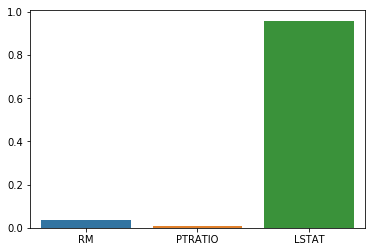

In [407]:
#import seaborn as sns
sns.barplot(x=fImpnames, y=NonZero_fImpValues)

#### Note above that based on the REgression Tree's calculation of feature importance, LSTAT is the most important feature and
#### to a lesser extent RM and PTRATIO is also important while all others have no importance. 
How does this compare to what to the features that reflected non-zero coefficients in the linear models ?


In [408]:
DTreeRegres_Pred = DtreeR_CV.predict(allXtestOrig)
DTreeRegres_Pred[0:5]

array([29.42894737, 29.42894737, 17.26229508, 23.86111111, 19.72037037])

In [409]:
MSE_DTreeRegres = mean_squared_error(Ytest,DTreeRegres_Pred)

In [410]:
R2_DTreeRegres = r2_score(Ytest,DTreeRegres_Pred)

In [411]:
R2_DTreeRegres

0.6844641010117789

In [412]:
k = len(allXtestOrig.columns)
n = len(allXtestOrig)
Adj_R2_DTreeRegres = 1- ( (1-R2_DTreeRegres)*(n-1)/(n-k-1))

In [413]:
print("Results for Regression Tree using all original "+ str(k)+ " predictors:")
print("MSE :",round(MSE_DTreeRegres,4))
print("R-Sq.:", round(R2_DTreeRegres,4))
print("Adj-R-sq.:",round(Adj_R2_DTreeRegres,4))

Results for Regression Tree using all original 13 predictors:
MSE : 28.9203
R-Sq.: 0.6845
Adj-R-sq.: 0.6547


In [414]:
print("Features used: ",allXtrainOrig.columns.values)

Features used:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## <font color = blue > Random Forest Regression Tree

In [415]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(random_state=40)
RFR.params = {'max_depth' : [x for x in np.arange(3,20)],'min_samples_split' : [int(x) for x in nrows_train*np.arange(0.1,0.9,0.1)],'min_samples_leaf' : [int(x) for x in nrows_train*np.arange(0.1,0.9,0.1)],'max_leaf_nodes' :[x for x in np.arange(5,20,1)]}

RFR_CV = GridSearchCV(estimator=RFR,param_grid=RFR.params,scoring = 'neg_mean_squared_error')


In [416]:
RFR_CV.fit(allXtrainOrig,Ytrain)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=40, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_split': [35, 70, 106, 141, 177, 212, 247, 283], 'min_samples_leaf': [35, 70, 106, 141, 177, 212, 247, 283], 'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [417]:
RFR_CV.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=5,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=35, min_samples_split=35,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=40, verbose=0, warm_start=False)

### Feature Importance

In [418]:
RFR_CV.best_estimator_.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.37015724e-02, 7.67489007e-02, 3.05017138e-03, 5.04177432e-04,
       0.00000000e+00, 0.00000000e+00, 2.95099477e-03, 2.62123207e-03,
       9.00422951e-01])

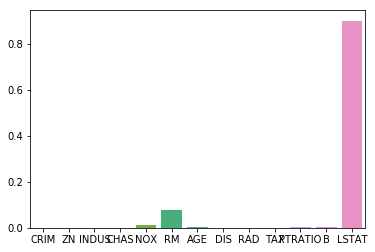

In [419]:
sns.barplot(x=FeaturesXonly,y=RFR_CV.best_estimator_.feature_importances_)


In [420]:
RFR_CV.best_score_

-35.317060023723485

In [421]:
Pred_RFR = RFR_CV.predict(allXtestOrig)

In [422]:
MSE_RFR = mean_squared_error(Ytest,Pred_RFR)
MSE_RFR

29.17473678718261

In [423]:
R2_RFR = r2_score(Ytest,Pred_RFR)
R2_RFR

0.6816878506474182

In [424]:
k= len(allXtestOrig.columns)
n = len(allXtestOrig)

Adj_R2_RFR = 1 - ( (1-R2_RFR)*(n-1) /(n-k-1) )

In [425]:
print("Results for Random Forest Regressor using all original "+ str(k)+ " predictors:")
print("MSE :",round(MSE_RFR,4))
print("R-Sq.:", round(R2_RFR,4))
print("Adj-R-sq.:",round(Adj_R2_RFR ,4))

Results for Random Forest Regressor using all original 13 predictors:
MSE : 29.1747
R-Sq.: 0.6817
Adj-R-sq.: 0.6517


## <font color = blue> Gradient Boosted Tree Model

In [426]:
from sklearn.ensemble import GradientBoostingRegressor


In [427]:
GBR = GradientBoostingRegressor(random_state=60)
GBR.params = {'max_depth' : [x for x in np.arange(3,20)],'min_samples_split' : [int(x) for x in nrows_train*np.arange(0.1,0.9,0.1)],'min_samples_leaf' : [int(x) for x in nrows_train*np.arange(0.1,0.9,0.1)],'max_leaf_nodes' :[x for x in np.arange(5,20,1)]}

GBR_CV = GridSearchCV(estimator= GBR,param_grid= GBR.params)

In [428]:
GBR_CV.fit(allXtrainOrig,Ytrain)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=60,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_split': [35, 70, 106, 141, 177, 212, 247, 283], 'min_samples_leaf': [35, 70, 106, 141, 177, 212, 247, 283], 'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### Feature importance 

In [429]:
GBR_CV.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=6, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=35,
             min_samples_split=35, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=60,
             subsample=1.0, verbose=0, warm_start=False)

In [430]:
fImpValues = GBR_CV.best_estimator_.feature_importances_
fImpValues

array([0.09279233, 0.        , 0.01556024, 0.        , 0.08773519,
       0.11610285, 0.06263054, 0.17883252, 0.01436051, 0.03938395,
       0.0727283 , 0.09708701, 0.22278656])

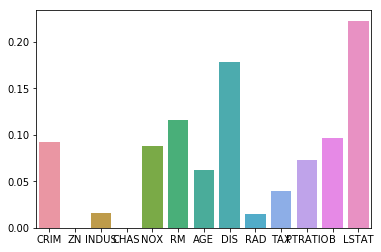

In [431]:
sns.barplot(x=FeaturesXonly,y=fImpValues)


In [432]:
Pred_GBR = GBR_CV.predict(allXtestOrig)

In [433]:
k= len(allXtestOrig.columns)
n = len(allXtestOrig)

MSE_GBR =mean_squared_error(Ytest, Pred_GBR)
R2_GBR = r2_score(Ytest,Pred_GBR)
Adj_R2_GBR = 1- ( (1-R2_GBR)*(n-1)/(n-k-1) )

In [434]:
print("Results for Gradient Boosted Regressor using all original "+ str(k)+ " predictors:")
print("MSE :",round(MSE_GBR,4))
print("R-Sq.:", round(R2_GBR,4))
print("Adj-R-sq.:",round(Adj_R2_GBR,4))


Results for Gradient Boosted Regressor using all original 13 predictors:
MSE : 11.144
R-Sq.: 0.8784
Adj-R-sq.: 0.867


In [435]:
Results = {'GBR' : {'MSE' : MSE_GBR, 'R2' : R2_GBR, 'Adj-R2' : Adj_R2_GBR},
          'RFR' : {'MSE': MSE_RFR,'R2': R2_RFR, 'Adj-R2' : Adj_R2_RFR}, 
          'DTreeRegres' : {'MSE': MSE_DTreeRegres, 'R2' : R2_DTreeRegres, 'Adj-R2' : Adj_R2_DTreeRegres},
          'LassoPolyallX' : {'MSE' : Results_PenlzPolyN["MSE"][1], 'R2' : Results_PenlzPolyN["R-sq"][1],'Adj-R2' : Results_PenlzPolyN["Adj_R_sq"][1]},
          'LassoAllX' : {'MSE' : MSE_LassoAllX, 'R2' : R2_LassoAllX, 'Adj-R2' : Adj_R_sq_LassoAllX},
          'LassoSubX' : {'MSE' : MSE_LassoRegressSubX, 'R2' : R2_LassoRegressSubX, 'Adj-R2' : Adj_R_sq_LassoRegressSubX},
        'PolyLinSubX' : {'MSE' : MSE_Poly2, 'R2' : R2_Poly2, 'Adj-R2' : Adj_R_sq_Poly2},
        'LinearSubX' : {'MSE' : MSE_LinearSubX, 'R2' : R2_LinearSubX, 'Adj-R2' : Adj_R2_LinearSubX} }           

In [436]:
print(Results.items())

dict_items([('GBR', {'MSE': 11.144006629237062, 'R2': 0.878412863552884, 'Adj-R2': 0.8669590028730831}), ('RFR', {'MSE': 29.17473678718261, 'R2': 0.6816878506474182, 'Adj-R2': 0.6517019235344939}), ('DTreeRegres', {'MSE': 28.92028098397095, 'R2': 0.6844641010117789, 'Adj-R2': 0.6547397047302799}), ('LassoPolyallX', {'MSE': 12.8183, 'R2': 0.8601, 'Adj-R2': 0.8297}), ('LassoAllX', {'MSE': 20.81632238389706, 'R2': 0.772882670100195, 'Adj-R2': 0.7550377370366388}), ('LassoSubX', {'MSE': 35.12683, 'R2': 0.61675, 'Adj-R2': 0.60089}), ('PolyLinSubX', {'MSE': 25.7874, 'R2': 0.7186, 'Adj-R2': 0.707}), ('LinearSubX', {'MSE': 34.66431367021152, 'R2': 0.621793599349807, 'Adj-R2': 0.6061436793229025})])


In [437]:
ModelNames = [m[0] for m in Results.items()] 
ModelNames

['GBR',
 'RFR',
 'DTreeRegres',
 'LassoPolyallX',
 'LassoAllX',
 'LassoSubX',
 'PolyLinSubX',
 'LinearSubX']

In [438]:
MSE = [m[1]['MSE'] for m in Results.items()] 

In [439]:
R2 = [m[1]['R2'] for m in Results.items()]

In [440]:
Adj_R2 = [m[1]['Adj-R2'] for m in Results.items()]

## Results across all Models explored

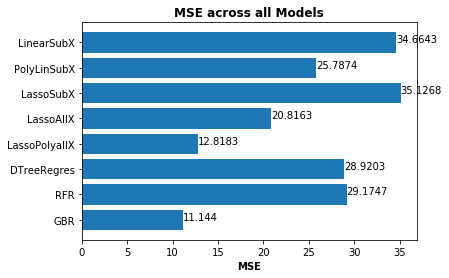

In [441]:
plt.barh(ModelNames,MSE)
plt.xlabel("MSE",fontweight='bold')
plt.title("MSE across all Models",fontweight='bold')

for i,v in enumerate(MSE) :
    v= round(v,4)
    plt.text(v,i,str(v),color='black')

#Ref. : https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

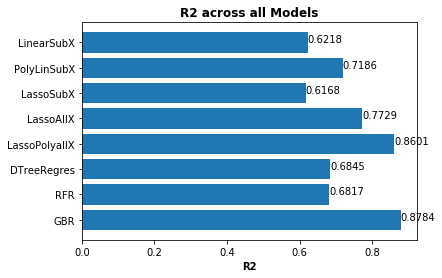

In [442]:
plt.barh(ModelNames,R2)
plt.xlabel("R2",fontweight='bold')
plt.title("R2 across all Models",fontweight='bold')

for i, v in enumerate(R2):
    v = round(v,4)
    plt.text(v, i,str(v), color='black')

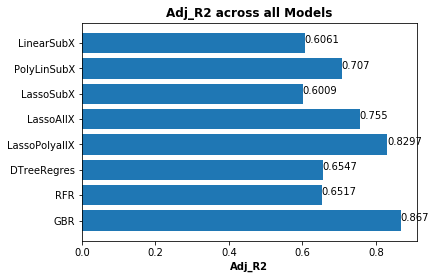

In [443]:
plt.barh(ModelNames,Adj_R2)
plt.xlabel("Adj_R2",fontweight='bold')
plt.title("Adj_R2 across all Models",fontweight='bold')

for i, v in enumerate(Adj_R2):
    v = round(v,4)
    plt.text(v, i,str(v), color='black')

In [444]:
dfplot = pd.DataFrame()

In [445]:
dfplot['ModelNames']= ModelNames
dfplot['MSE'] =MSE
dfplot['R2'] =R2
dfplot['Adj-R2'] = Adj_R2

In [446]:
dfplot

,ModelNames,MSE,R2,Adj-R2
0,GBR,11.144007,0.878413,0.866959
1,RFR,29.174737,0.681688,0.651702
2,DTreeRegres,28.920281,0.684464,0.654740
3,LassoPolyallX,12.818300,0.860100,0.829700
4,LassoAllX,20.816322,0.772883,0.755038
5,LassoSubX,35.126830,0.616750,0.600890
6,PolyLinSubX,25.787400,0.718600,0.707000
7,LinearSubX,34.664314,0.621794,0.606144


In [447]:
dfplot.index_col =0

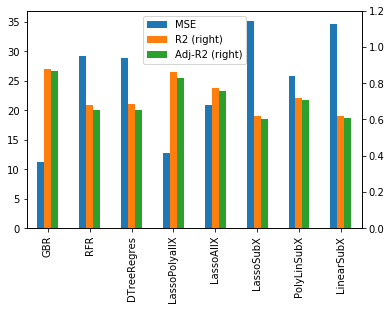

In [509]:

dfplot.plot(kind= 'bar' , secondary_y= ['R2','Adj-R2'] , rot= 60)
# Set the labels for the x ticks

plt.xticks(np.arange(8), ModelNames)

plt.ylim(0,1.2)
plt.show()

## <font color = "blue" > Conclusion 
 **Gradient Boosted Machine emerged as the best performing model** as it had the best MSE, R2 and adj-R2 of all the models.
 **Note however, if there was a great need to be able to explain the model, I would opt. to use Penalized Linear Regression - Lasso**. In this case, the polynomial transformations of all features were used.

#### References :
Feature Impt. Decision Trees & Random Forest

https://medium.com/@srnghn/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3



Perform feature selection on training dataset only

https://machinelearningmastery.com/an-introduction-to-feature-selection/



qqplot code 

http://www.insightsbot.com/blog/HeGop/assumptions-of-linear-regression-with-python



Plynomial Linear Regression Code implementation

https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/



Decision Tree Hyper-parameters: 

https://stackoverflow.com/questions/46480457/difference-between-min-samples-split-and-min-samples-leaf-in-sklearn-decisiontre



Regression Analysis :

https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-guide-regression-analysis-plot-interpretations/tutorial/¶



Linear Regression Assumptions:

https://statisticsbyjim.com/regression/ols-linear-regression-assumptions/

Gradient Boosting :

https://stats.stackexchange.com/questions/173390/gradient-boosting-tree-vs-random-forest

http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/



